In [1]:
import pandas as pd
from pathlib import Path
from anndata import read_h5ad
# import matplotlib_venn
import scanpy as sc
import numpy as np
import stlearn as st
import anndata as ad
import seaborn as sns
from matplotlib import pyplot as plt
import pickle
import sys
from scipy.stats import zscore
sys.path.insert(0, '/scratch/project_mnt/S0010/Xiao/STimage/')
from stimage._utils import gene_plot, Read10X, pattern_matrix
from tqdm import tqdm
import multiprocessing as mp

/scratch/project_mnt/S0010/Xiao/micromamba/envs/stimage/lib/python3.8/site-packages/stlearn/tools/microenv/cci/het.py:192: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(parallel=True, nopython=False)


In [2]:
from scipy import stats
def calculate_correlation(attr_1, attr_2):
    r = stats.pearsonr(attr_1, 
                       attr_2)[0]
    return r

def z_2l(df):
    df_z = df.apply(zscore).fillna(0)
    df_z_2 = df_z.apply(lambda x: pd.cut(x,[-np.inf, 0, np.inf],labels=[1,2]))
    return df_z_2

In [3]:
# Wiener
BASE_PATH = Path("/scratch/imb/Xiao/")

In [4]:
# Bunya
BASE_PATH = Path("/scratch/project_mnt/S0010/Xiao")

In [5]:
PATH_PRED = BASE_PATH / "Q1851/Xiao/Wiener_backup/STimage_exp/stimage_tile_size_bunya"

In [6]:
df_no = pd.DataFrame()
for file in (BASE_PATH / "Q1851/Xiao/Wiener_backup/STimage_exp/stimage_no_norm").rglob("stimage_cor*.csv"):
    # print(file)
    df_no = pd.concat([df_no, pd.read_csv(file, index_col=0)], axis=1)
df_no = df_no.T
df_no["Pearson correlation"] = df_no["Pearson correlation"].astype(float)
df_no["config"] = "without normalization"

In [7]:
# df_norm = pd.DataFrame()
# for file in (BASE_PATH / "Q1851/Xiao/Wiener_backup/STimage_exp/stimage_tile_size_bunya/stimage_tile_size_299").rglob("stimage_cor*.csv"):
#     # print(file)
#     df_norm = pd.concat([df_norm, pd.read_csv(file, index_col=0)], axis=0)
# df_norm["config"] = "with normalization"

In [8]:
df_norm = pd.DataFrame()
for file in (BASE_PATH / "Q1851/Xiao/Wiener_backup/STimage_exp/stimage_tile_size_bunya").rglob("stimage_tile_size_299/stimage_cor*.csv"):
    # print(file)
    df_norm = pd.concat([df_norm, pd.read_csv(file, index_col=0)], axis=1)
df_norm = df_norm.T
df_norm["Pearson correlation"] = df_norm["Pearson correlation"].astype(float)
df_norm["config"] = "With normalization"

In [9]:
df_no

,Gene,Pearson correlation,Slide,Method,Tile_size,config
0,ISG15,-0.127034,FFPE,STimage,no_norm,without normalization
1,TNFRSF18,-0.063729,FFPE,STimage,no_norm,without normalization
2,TNFRSF4,-0.119840,FFPE,STimage,no_norm,without normalization
3,CALML6,-0.063228,FFPE,STimage,no_norm,without normalization
4,HES5,-0.047461,FFPE,STimage,no_norm,without normalization
...,...,...,...,...,...,...
1517,ETS2,0.018423,1160920F,STimage,no_norm,without normalization
1518,MX1,-0.085301,1160920F,STimage,no_norm,without normalization
1519,TMPRSS2,0.045751,1160920F,STimage,no_norm,without normalization
1520,ITGB2,0.046077,1160920F,STimage,no_norm,without normalization


In [10]:
df_norm

,Gene,Pearson correlation,Slide,Method,Tile_size,config
0,ISG15,-0.014104,FFPE,STimage,299,With normalization
1,TNFRSF18,-0.023295,FFPE,STimage,299,With normalization
2,TNFRSF4,-0.131900,FFPE,STimage,299,With normalization
3,CALML6,-0.057468,FFPE,STimage,299,With normalization
4,HES5,-0.032661,FFPE,STimage,299,With normalization
...,...,...,...,...,...,...
1517,ETS2,0.011108,1160920F,STimage,299,With normalization
1518,MX1,-0.054176,1160920F,STimage,299,With normalization
1519,TMPRSS2,-0.046214,1160920F,STimage,299,With normalization
1520,ITGB2,0.060362,1160920F,STimage,299,With normalization


In [11]:
df= pd.concat([df_norm, df_no], axis=0)

In [12]:
# top_100gene = df[df["config"] == "With normalization"].groupby("Gene")["Pearson correlation"].mean().sort_values(ascending=False)[0:100].index

In [13]:
# import pickle
# with open("top100gene_norm.pickle", "wb") as f:
#     pickle.dump(top_100gene, f)

In [14]:
#read pickle file
with open("top100gene_norm.pickle", "rb") as f:
    top_100gene = pickle.load(f)

In [15]:
df_top100 = df[df["Gene"].isin(top_100gene)]

(0.0, 1.0)

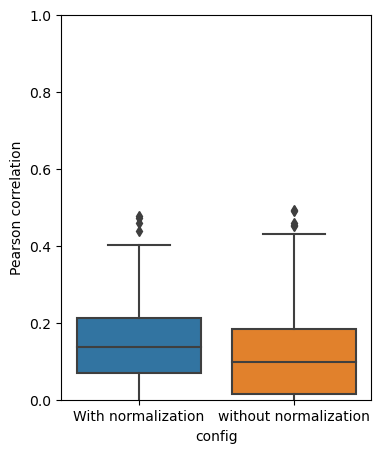

In [16]:
ax, fig = plt.subplots(figsize=(4,5))
sns.boxplot(x="config", y="Pearson correlation", data=df_top100)
plt.ylim(0,1)

In [17]:
samples = ["1160920F", "FFPE"]
tile_size = 299

In [18]:
df = pd.DataFrame()
def task1(gene):
    return pattern_matrix(adata, gene, library_id, "gc_b", "pred_b")


def task2(gene):
    return calculate_correlation(adata_gc.to_df().loc[:,gene].values,
                                       adata.to_df().loc[:,gene].values)

for sample in tqdm(samples):
    adata_all = read_h5ad(f"/scratch/project_mnt/S0010/Xiao/9visium_no_norm/all_adata.h5ad")
    adata_gc = adata_all[adata_all.obs["library_id"] == sample].copy()
    adata = ad.read_h5ad(BASE_PATH / "Q1851/Xiao/Wiener_backup/STimage_exp/stimage_no_norm" / f"pred_{sample}.h5ad")
    gc_df_2l = z_2l(adata_gc.to_df())
    pred_df_2l = z_2l(adata.to_df())
    adata.obsm["gc_b"] = gc_df_2l
    adata.obsm["pred_b"] = pred_df_2l
    library_id = sample
    plt.clf()
    with mp.Pool(25) as p:
        for i, results in enumerate(p.map(task1, top_100gene)):
            df = pd.concat([df, pd.Series([top_100gene[i], results, library_id, "Customised_IoU", "Without Normalization"], 
                                    index=["Gene", "Score", "Slide", "Matrix", "Config"])], axis=1, ignore_index=True)
    with mp.Pool(25) as p:
        for i, results in enumerate(p.map(task2, top_100gene)):
            df = pd.concat([df, pd.Series([top_100gene[i], results, library_id, "PCC", "Without Normalization"], 
                                index=["Gene", "Score", "Slide", "Matrix", "Config"])], axis=1, ignore_index=True)

for sample in tqdm(samples):
    adata_all = read_h5ad(f"/scratch/project_mnt/S0010/Xiao/9visium_norm_{tile_size}/all_adata.h5ad")
    adata_gc = adata_all[adata_all.obs["library_id"] == sample].copy()
    adata = ad.read_h5ad(PATH_PRED / f"stimage_tile_size_{tile_size}" / f"pred_{sample}.h5ad")
    gc_df_2l = z_2l(adata_gc.to_df())
    pred_df_2l = z_2l(adata.to_df())
    adata.obsm["gc_b"] = gc_df_2l
    adata.obsm["pred_b"] = pred_df_2l
    library_id = sample
    plt.clf()
    with mp.Pool(25) as p:
        for i, results in enumerate(p.map(task1, top_100gene)):
            df = pd.concat([df, pd.Series([top_100gene[i], results, library_id, "Customised_IoU", "With Normalization"], 
                                    index=["Gene", "Score", "Slide", "Matrix", "Config"])], axis=1, ignore_index=True)
    with mp.Pool(25) as p:
        for i, results in enumerate(p.map(task2, top_100gene)):
            df = pd.concat([df, pd.Series([top_100gene[i], results, library_id, "PCC", "With Normalization"], 
                                index=["Gene", "Score", "Slide", "Matrix", "Config"])], axis=1, ignore_index=True)


100%|██████████| 2/2 [01:56<00:00, 58.14s/it]


<Figure size 640x480 with 0 Axes>

In [19]:
df = df.T

In [20]:
df

,Gene,Score,Slide,Matrix,Config
0,PROM1,0.663841,1160920F,Customised_IoU,Without Normalization
1,AFDN,0.755689,1160920F,Customised_IoU,Without Normalization
2,RAD21,0.672436,1160920F,Customised_IoU,Without Normalization
3,CUL1,0.813539,1160920F,Customised_IoU,Without Normalization
4,SRSF2,0.809304,1160920F,Customised_IoU,Without Normalization
...,...,...,...,...,...
795,PSMD2,0.350794,FFPE,PCC,With Normalization
796,BCR,0.191556,FFPE,PCC,With Normalization
797,CYFIP2,0.150902,FFPE,PCC,With Normalization
798,CXCL16,0.100462,FFPE,PCC,With Normalization


In [21]:
df.to_csv("results_stain_norm.csv")

In [22]:
df_pcc = df[df["Matrix"] == "PCC"]
df_iou = df[df["Matrix"] == "Customised_IoU"]

<Figure size 640x480 with 0 Axes>

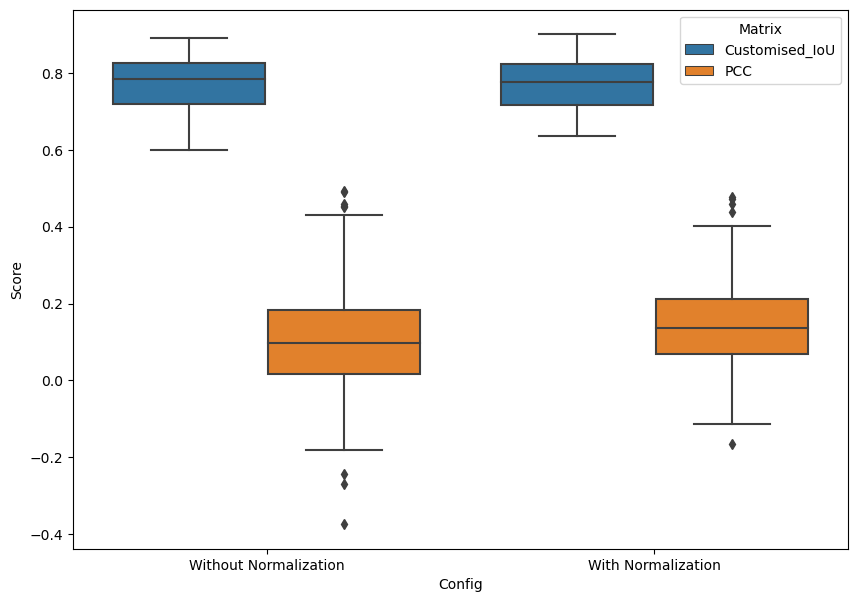

In [23]:
plt.clf()
ax, fig = plt.subplots(figsize=(10,7))
# "Gene", "Score", "Slide", "Matrix"
sns.boxplot(x="Config", y="Score", hue = "Matrix", data=df)
# plt.ylim(0,1)
plt.savefig("results_stain_norm.pdf", dpi=300)

In [2]:
# plt.clf()
# ax, fig = plt.subplots(figsize=(10,7))
# # "Gene", "Score", "Slide", "Matrix"
# sns.boxplot(x="Config", y="Score", hue = "Matrix", data=df_pcc)
# # plt.ylim(0,1)
# plt.savefig("results_stain_norm_df_pcc.pdf", dpi=300)

In [1]:
# plt.clf()
# ax, fig = plt.subplots(figsize=(10,7))
# # "Gene", "Score", "Slide", "Matrix"
# sns.boxplot(x="Config", y="Score", hue = "Matrix", data=df_iou)
# # plt.ylim(0,1)
# plt.savefig("results_stain_norm_df_iou.pdf", dpi=300)